In [1]:
#Importar paquetes de herramientas:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/My Drive/Ciencia de datos TP

/content/drive/.shortcut-targets-by-id/1Zts-l0lnVaaTin8zIMuKBguRsve-NFs3/Ciencia de datos TP


In [4]:
riesgo = pd.read_csv('/content/drive/.shortcut-targets-by-id/1Zts-l0lnVaaTin8zIMuKBguRsve-NFs3/Ciencia de datos TP/factorderiesgo.csv', delimiter=';')


In [5]:
riesgo_tp=riesgo[['cod_provincia', 'bhcv01', 'tipo_hogar', 'bhih01', 'bhih03', 'bhch03', 'bhch04', 'bhch05', 'nivel_instruccion', 'condicion_actividad', 'bisg01', 'cobertura_salud','biaf01', 'barreras_actividad_fisica','bita01','biha03', 'bima10', 'bima07', 'bial05','bial08','bico03','bica01','bidi01','imc_bima','promedio_sistolica','promedio_diastolica','ta_elevada']]


In [6]:
riesgo_tp.rename(columns={"bhcv01":"Tipo_Vivienda","bhih01":"Ingresos_Hogar","bhih03":"AUH","bhch03":"Sexo","bhch04":"Edad", "bhch05":"Situacion_Conyugal","bisg01":"Salud_General","biaf01":"Actividad_Fisica_PorSemana","bita01":"Fumo_Cigarrillo","biha03":"Cantidad_Diagnosticos_PresionAlta", "bima10":"Peso", "bima07":"Altura", "bial05":"Cantidad_Dias_Verdura", "bial08":"Alimentacion", "bico03":"Colesterol", "bica01":"Bebio_Alcohol", "bidi01":"Diabetes","imc_bima":"Masa_Corporal","ta_elevada":"Presion_Arterial"}, inplace=True)


In [7]:
riesgo_tp.shape

(29224, 27)

In [8]:
riesgo_tp.head()

,cod_provincia,Tipo_Vivienda,tipo_hogar,Ingresos_Hogar,AUH,Sexo,Edad,Situacion_Conyugal,nivel_instruccion,condicion_actividad,Salud_General,cobertura_salud,Actividad_Fisica_PorSemana,barreras_actividad_fisica,Fumo_Cigarrillo,Cantidad_Diagnosticos_PresionAlta,Peso,Altura,Cantidad_Dias_Verdura,Alimentacion,Colesterol,Bebio_Alcohol,Diabetes,Masa_Corporal,promedio_sistolica,promedio_diastolica,Presion_Arterial
0,2,3,2,50000,2,1,32,6,7,1,3,2,4,1,2,3,106.0,181.0,7.0,2,2,1,2,32.36,147.5,98.5,1.0
1,2,1,4,40000,2,2,65,2,7,1,1,1,3,1,1,3,NaN,NaN,5.0,2,1,1,2,NaN,NaN,NaN,NaN
2,2,3,2,40000,2,2,33,6,7,1,2,1,0,9,1,3,NaN,NaN,5.0,2,2,1,2,NaN,NaN,NaN,NaN
3,2,3,1,80000,2,2,64,3,7,1,3,1,0,1,1,3,NaN,NaN,7.0,2,1,1,2,NaN,NaN,NaN,NaN
4,2,3,8,30000,2,1,24,6,5,1,3,1,0,1,1,3,NaN,NaN,3.0,2,2,1,2,NaN,NaN,NaN,NaN


In [9]:
riesgo_tp.describe()

,cod_provincia,Tipo_Vivienda,tipo_hogar,Ingresos_Hogar,AUH,Sexo,Edad,Situacion_Conyugal,nivel_instruccion,condicion_actividad,Salud_General,cobertura_salud,Actividad_Fisica_PorSemana,barreras_actividad_fisica,Fumo_Cigarrillo,Cantidad_Diagnosticos_PresionAlta,Peso,Altura,Cantidad_Dias_Verdura,Alimentacion,Colesterol,Bebio_Alcohol,Diabetes,Masa_Corporal,promedio_sistolica,promedio_diastolica,Presion_Arterial
count,29224.000000,29224.000000,29224.000000,29224.000000,29224.000000,29224.000000,29224.000000,29224.00000,29224.000000,29224.000000,29224.000000,29224.000000,29224.000000,29224.000000,29224.000000,29224.000000,16425.000000,16491.000000,28937.000000,29224.000000,29224.000000,29224.000000,29224.000000,16410.000000,16227.000000,16227.000000,16227.000000
mean,38.383931,1.307692,3.646181,22446.653846,2.829147,1.569121,46.489084,3.38287,4.673727,1.744662,2.798932,1.304647,0.718964,5.179784,1.480495,3.213557,76.143805,164.182221,4.609496,2.376027,3.172324,1.331474,2.313817,28.221648,130.650490,84.165527,1.600419
std,28.722040,0.751898,2.096413,19756.586805,9.966130,0.495208,18.052815,1.99178,1.605286,0.942676,0.960866,0.460266,1.571123,4.037565,0.499628,8.218699,17.421392,9.705348,2.176318,5.076342,11.565054,3.454288,6.595610,5.919656,20.888462,12.542099,0.489827
min,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,18.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,33.000000,114.000000,0.000000,1.000000,1.000000,1.000000,1.000000,14.150000,67.000000,31.000000,1.000000
25%,10.000000,1.000000,2.000000,10000.000000,2.000000,1.000000,32.000000,2.00000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,2.000000,64.000000,157.000000,3.000000,2.000000,2.000000,1.000000,2.000000,24.010000,116.000000,75.500000,1.000000
50%,34.000000,1.000000,4.000000,18000.000000,2.000000,2.000000,44.000000,3.00000,5.000000,1.000000,3.000000,1.000000,0.000000,5.000000,1.000000,3.000000,74.000000,164.000000,5.000000,2.000000,2.000000,1.000000,2.000000,27.410000,127.500000,83.500000,2.000000
75%,62.000000,1.000000,5.000000,30000.000000,2.000000,2.000000,61.000000,6.00000,6.000000,3.000000,3.000000,2.000000,0.000000,9.000000,2.000000,3.000000,86.000000,171.000000,7.000000,3.000000,2.000000,1.000000,2.000000,31.550000,141.500000,91.500000,2.000000
max,94.000000,7.000000,8.000000,420000.000000,99.000000,2.000000,104.000000,6.00000,8.000000,3.000000,5.000000,2.000000,7.000000,13.000000,2.000000,99.000000,200.000000,201.000000,7.000000,99.000000,99.000000,99.000000,99.000000,86.570000,249.000000,167.500000,2.000000


In [10]:
riesgo_tp['cod_provincia'] = riesgo_tp['cod_provincia'].map({2 : 'Ciudad de Buenos Aires' ,6 : 'Buenos Aires',10 : 'Catamarca',14 : 'Cordoba',18 : 'Corrientes',22 : 'Chaco',26 : 'Chubut',30 : 'Entre Rios',34 : 'Formosa',38 : 'Jujuy',42 : 'La Pampa',46 : 'La Rioja',50 : 'Mendoza',54 : 'Misiones',58 : 'Neuquen',62 : 'Rio Negro',66 : 'Salta',70 : 'San Juan',74 : 'San Luis',78 : 'Santa Cruz',82 : 'Santa Fe',86 : 'Santiago del Estero',90 : 'Tucuman',94 : 'Tierra del Fuego'})
riesgo_tp['Tipo_Vivienda'] = riesgo_tp['Tipo_Vivienda'].map({1 : 'Casa' ,2 : 'Casilla',3 : 'Departamento',4 : 'Pieza de inquilinato',5 : 'Pieza en hotel o pensión',6 : 'Local no construido para habitación',7 : 'Otros'})
riesgo_tp['tipo_hogar'] = riesgo_tp['tipo_hogar'].map({1 : 'Hogar unipersonal' ,2 : 'Cony completo s/hijos ni otros',3 : 'Cony completo s/hijos y c/otros',4 : 'Cony completo c/hijos s/otros',5 : 'Cony completo c/hijos y otros',6 : 'Cony incompleto sin otros',7 : 'Cony incompleto c/otros',8 : 'No conyugal'})
riesgo_tp['AUH'] = riesgo_tp['AUH'].map({1 : 'Si' ,2 : 'No',99 : 'NS/NC'})
riesgo_tp['Sexo'] = riesgo_tp['Sexo'].map({1 : 'Hombre' ,2 : 'Mujer'})
riesgo_tp['Situacion_Conyugal'] = riesgo_tp['Situacion_Conyugal'].map({1 : 'Unido/a' ,2 : 'Casado/a',3 : 'Separado/a',4 : 'Divorciado/a',5 : 'Viudo/a',6 : 'Soltero/a'})
riesgo_tp['nivel_instruccion'] = riesgo_tp['nivel_instruccion'].map({1 : 'Sin instrucción' ,2 : 'Primario incompleto',3 : 'Primario completo',4 : 'Secundario incompleto',5 : 'Secundario completo',6 : 'Terciario/universitario incompleto',7 : 'Terciario/universitario completo',8 : 'Educación especial'})
riesgo_tp['Cantidad_Diagnosticos_PresionAlta'] = riesgo_tp['Cantidad_Diagnosticos_PresionAlta'].map({1 : 'Sólo 1 vez' ,2 : 'Más de 1 vez',3 : 'Ninguna',99 : 'NS/NC'})
riesgo_tp['Alimentacion'] = riesgo_tp['Alimentacion'].map({1 : 'Muy saludable' ,2 : 'Bastante saludable',3 : 'Poco saludable',4 : 'Nada saludable',99 : 'NS/NC'})
riesgo_tp['Colesterol'] = riesgo_tp['Colesterol'].map({1 : 'Si' ,2 : 'No',99 : 'NS/NC'})
riesgo_tp['condicion_actividad'] = riesgo_tp['condicion_actividad'].map({1 : 'Ocupado' ,2 : 'Desocupado',3 : 'Inactivo'})
riesgo_tp['Salud_General'] = riesgo_tp['Salud_General'].map({1 : 'Excelente' ,2 : 'Muy buena',3 : 'Buena',4 : 'Regular',5 : 'Mala'})
riesgo_tp['Fumo_Cigarrillo'] = riesgo_tp['Fumo_Cigarrillo'].map({1 : 'Si' ,2 : 'No'})
riesgo_tp['Bebio_Alcohol'] = riesgo_tp['Bebio_Alcohol'].map({1 : 'Si' ,2 : 'No',99 : 'NS/NC'})
riesgo_tp['Diabetes'] = riesgo_tp['Diabetes'].map({1 : 'Si' ,2 : 'No',99 : 'NS/NC'})
riesgo_tp['Presion_Arterial'] = riesgo_tp['Presion_Arterial'].map({1 : 'Elevada' ,2 : 'No elevada'})

In [11]:
riesgo_tp.dropna(how ='any', inplace = True)

In [12]:
np.shape(riesgo_tp)

(15912, 27)

In [13]:
riesgo_tp.columns.tolist()

['cod_provincia',
 'Tipo_Vivienda',
 'tipo_hogar',
 'Ingresos_Hogar',
 'AUH',
 'Sexo',
 'Edad',
 'Situacion_Conyugal',
 'nivel_instruccion',
 'condicion_actividad',
 'Salud_General',
 'cobertura_salud',
 'Actividad_Fisica_PorSemana',
 'barreras_actividad_fisica',
 'Fumo_Cigarrillo',
 'Cantidad_Diagnosticos_PresionAlta',
 'Peso',
 'Altura',
 'Cantidad_Dias_Verdura',
 'Alimentacion',
 'Colesterol',
 'Bebio_Alcohol',
 'Diabetes',
 'Masa_Corporal',
 'promedio_sistolica',
 'promedio_diastolica',
 'Presion_Arterial']

In [14]:
riesgo_tp = riesgo_tp[riesgo_tp.Colesterol != 'NS/NC']

In [15]:
np.shape(riesgo_tp)

(15676, 27)

In [16]:
riesgo_tp = riesgo_tp[riesgo_tp.Diabetes != 'NS/NC']

In [17]:
np.shape(riesgo_tp)

(15622, 27)

In [18]:
Provincia=pd.get_dummies(riesgo_tp.cod_provincia)
Edad=riesgo_tp.Edad
Peso=riesgo_tp.Peso
Altura=riesgo_tp.Altura
Actividad_Fisica=riesgo_tp.Actividad_Fisica_PorSemana
Sexo = pd.get_dummies(riesgo_tp.Sexo)
Presion=riesgo_tp.promedio_sistolica
Cigarrillo=pd.get_dummies(riesgo_tp.Fumo_Cigarrillo)
Alcohol=pd.get_dummies(riesgo_tp.Bebio_Alcohol)
Ingresos=riesgo_tp.Ingresos_Hogar
Trabajo=pd.get_dummies(riesgo_tp.condicion_actividad)
Verdura=riesgo_tp.Cantidad_Dias_Verdura


In [19]:
x = pd.concat([Edad,Peso,Actividad_Fisica,Sexo,Cigarrillo], axis = 1)
x.head()



,Edad,Peso,Actividad_Fisica_PorSemana,Hombre,Mujer,No,Si
0,32,106.0,4,1,0,1,0
7,42,58.0,0,0,1,0,1
8,32,71.0,0,1,0,0,1
11,76,95.0,0,1,0,1,0
13,63,86.0,0,0,1,0,1


In [20]:
def flag_riesgo_tp(riesgo_tp):

    if (riesgo_tp['Diabetes'] == 'Si') or (riesgo_tp['Colesterol'] == 'Si')or(riesgo_tp['Masa_Corporal'] >= 30)or(riesgo_tp['promedio_sistolica'] >= 140) :
        return 'Paciente de riesgo'
    else :
        return "No es Paciente de riesgo"
        
riesgo_tp['Riesgo'] = riesgo_tp.apply(flag_riesgo_tp, axis = 1)

In [21]:
riesgo_tp

,cod_provincia,Tipo_Vivienda,tipo_hogar,Ingresos_Hogar,AUH,Sexo,Edad,Situacion_Conyugal,nivel_instruccion,condicion_actividad,Salud_General,cobertura_salud,Actividad_Fisica_PorSemana,barreras_actividad_fisica,Fumo_Cigarrillo,Cantidad_Diagnosticos_PresionAlta,Peso,Altura,Cantidad_Dias_Verdura,Alimentacion,Colesterol,Bebio_Alcohol,Diabetes,Masa_Corporal,promedio_sistolica,promedio_diastolica,Presion_Arterial,Riesgo
0,Ciudad de Buenos Aires,Departamento,Cony completo s/hijos ni otros,50000,No,Hombre,32,Soltero/a,Terciario/universitario completo,Ocupado,Buena,2,4,1,No,Ninguna,106.0,181.0,7.0,Bastante saludable,No,Si,No,32.36,147.5,98.5,Elevada,Paciente de riesgo
7,Ciudad de Buenos Aires,Otros,Cony completo c/hijos s/otros,40000,No,Mujer,42,Casado/a,Terciario/universitario completo,Ocupado,Muy buena,1,0,1,Si,Ninguna,58.0,159.0,7.0,Bastante saludable,Si,Si,No,22.94,103.0,84.0,No elevada,Paciente de riesgo
8,Ciudad de Buenos Aires,Casa,Cony completo s/hijos ni otros,40000,No,Hombre,32,Unido/a,Terciario/universitario completo,Ocupado,Excelente,2,0,9,Si,Ninguna,71.0,184.0,3.0,Poco saludable,No,Si,No,20.97,139.0,105.0,Elevada,No es Paciente de riesgo
11,Ciudad de Buenos Aires,Casa,Cony completo s/hijos ni otros,16000,No,Hombre,76,Casado/a,Secundario incompleto,Inactivo,Buena,1,0,9,No,Ninguna,95.0,164.0,3.0,Bastante saludable,No,Si,No,35.32,168.0,93.5,Elevada,Paciente de riesgo
13,Ciudad de Buenos Aires,Departamento,Hogar unipersonal,37000,No,Mujer,63,Soltero/a,Terciario/universitario incompleto,Inactivo,Regular,1,0,5,Si,Más de 1 vez,86.0,168.0,0.0,Poco saludable,No,Si,Si,30.47,144.5,90.5,Elevada,Paciente de riesgo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29216,Tierra del Fuego,Casa,Hogar unipersonal,30000,No,Hombre,86,Viudo/a,Secundario completo,Inactivo,Regular,1,0,5,Si,Ninguna,71.0,157.0,7.0,Bastante saludable,No,Si,Si,28.80,139.0,77.0,No elevada,Paciente de riesgo
29217,Tierra del Fuego,Casa,Cony incompleto c/otros,140000,No,Hombre,29,Unido/a,Terciario/universitario completo,Ocupado,Muy buena,1,6,1,Si,Ninguna,85.0,173.0,3.0,Bastante saludable,No,Si,No,28.40,130.0,70.5,No elevada,No es Paciente de riesgo
29220,Tierra del Fuego,Casa,Cony completo c/hijos s/otros,30000,No,Hombre,62,Casado/a,Secundario incompleto,Desocupado,Buena,1,0,9,Si,Más de 1 vez,101.0,183.0,5.0,Bastante saludable,Si,Si,No,30.16,120.0,89.0,No elevada,Paciente de riesgo
29221,Tierra del Fuego,Casa,No conyugal,51000,No,Mujer,74,Viudo/a,Secundario completo,Ocupado,Buena,1,0,5,Si,Más de 1 vez,64.0,154.0,6.0,Muy saludable,Si,No,No,26.99,161.5,96.0,Elevada,Paciente de riesgo


In [22]:
riesgo_tp.value_counts('Riesgo')

Riesgo
Paciente de riesgo          9321
No es Paciente de riesgo    6301
dtype: int64

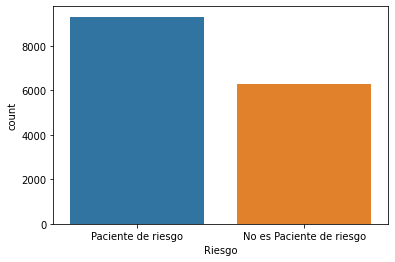

In [23]:
sns.countplot(riesgo_tp['Riesgo'])

In [24]:
y = riesgo_tp['Riesgo']
 

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.2, random_state=0)


In [26]:
sc = StandardScaler()
xtrain_scal = sc.fit_transform(xtrain)
xtest_scal = sc.fit_transform(xtest)

In [27]:
ytrain.head()

12368    No es Paciente de riesgo
9465           Paciente de riesgo
20528          Paciente de riesgo
4531           Paciente de riesgo
22479    No es Paciente de riesgo
Name: Riesgo, dtype: object

In [28]:
results_df = pd.DataFrame(columns=['Model','Accuracy'])

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain_scal,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
lr_pred=lr.predict(xtest_scal)
lr_pred

array(['No es Paciente de riesgo', 'Paciente de riesgo',
       'No es Paciente de riesgo', ..., 'Paciente de riesgo',
       'Paciente de riesgo', 'No es Paciente de riesgo'], dtype=object)

In [31]:
lr_acc=metrics.accuracy_score(ytest, lr_pred)
lr_acc

0.77152

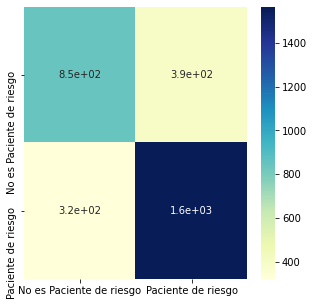

In [32]:
cm_lr = metrics.confusion_matrix(ytest, lr_pred)
df_cm_lr = pd.DataFrame(cm_lr, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm_lr, annot=True, cmap="YlGnBu")
plt.show()

In [33]:
cm_lr

array([[ 848,  391],
       [ 323, 1563]])

In [34]:
#Guardamos los resultados
results_df = results_df.append({'Model':'Logistic regression',
                                'Accuracy':lr_acc},ignore_index=True)

### SVC

In [35]:
svc = SVC()

In [36]:
svc.fit(xtrain_scal, ytrain)
svc_pred = svc.predict(xtest_scal)

In [37]:
svc_acc=metrics.accuracy_score(ytest, svc_pred)
svc_acc

0.78976

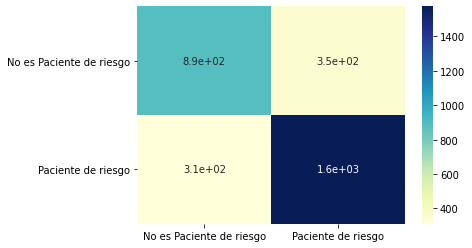

In [38]:
cm_svc = metrics.confusion_matrix(ytest, svc_pred)
df_cm_svc = pd.DataFrame(cm_svc, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm_svc, annot=True, cmap="YlGnBu")
plt.show()

In [39]:
cm_svc

array([[ 893,  346],
       [ 311, 1575]])

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc = RandomForestClassifier(n_estimators= 1200)
rfc.fit(xtrain_scal, ytrain)
rfc_pred = rfc.predict(xtest_scal)
rfc_acc=metrics.accuracy_score(ytest, rfc_pred)
rfc_acc

0.73024

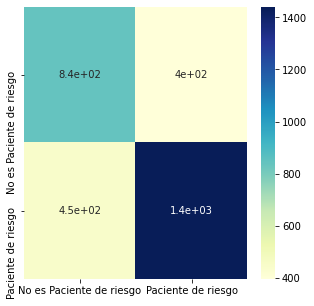

In [42]:
cm_rfc = metrics.confusion_matrix(ytest, rfc_pred)
df_cm_rfc = pd.DataFrame(cm_rfc, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm_rfc, annot=True, cmap="YlGnBu")
plt.show()

In [43]:
#Guardamos los resultados
results_df = results_df.append({'Model':'SVC',
                                'Accuracy':svc_acc},ignore_index=True)

### Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(xtrain_scal,ytrain)
nb_pred = nb.predict(xtest_scal)
nb_acc=metrics.accuracy_score(ytest, nb_pred)
nb_acc

0.77376

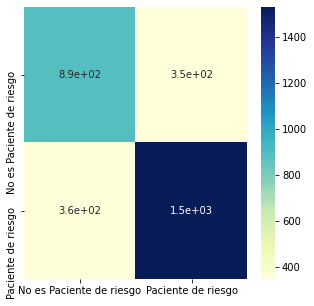

In [45]:
cm_nb = metrics.confusion_matrix(ytest, nb_pred)
df_cm_nb = pd.DataFrame(cm_nb, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm_nb, annot=True, cmap="YlGnBu")
plt.show()

In [46]:
cm_nb

array([[ 889,  350],
       [ 357, 1529]])

In [47]:
#Guardamos los resultados
results_df = results_df.append({'Model':'Naive Bayes',
                                'Accuracy':nb_acc},ignore_index=True)

### KNN

In [48]:
knn = KNeighborsClassifier(n_neighbors=400)
knn.fit(xtrain_scal, ytrain)
knn_pred = knn.predict(xtest_scal)
knn_acc = accuracy_score(ytest, knn_pred)
knn_acc

0.78048

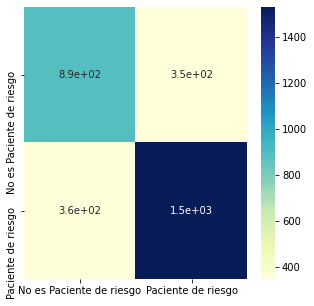

In [49]:
cm_knn = metrics.confusion_matrix(ytest, knn_pred)
df_cm_knn = pd.DataFrame(cm_nb, index = [i for i in np.unique(y)],columns = [i for i in np.unique(y)])
plt.figure(figsize = (5,5))
sns.heatmap(df_cm_knn, annot=True, cmap="YlGnBu")
plt.show()

In [50]:
#Guardamos los resultados
results_df = results_df.append({'Model':'KNN',
                                'Accuracy':knn_acc},ignore_index=True)

### Resultados 

In [51]:
results_df

,Model,Accuracy
0,Logistic regression,0.77152
1,SVC,0.78976
2,Naive Bayes,0.77376
3,KNN,0.78048
